In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [33]:
var = pd.read_csv('restaurant_data.csv')
print(var.head(10))

           Name  Location   Cuisine  Rating  Seating Capacity  \
0  Restaurant 0     Rural  Japanese     4.0                38   
1  Restaurant 1  Downtown   Mexican     3.2                76   
2  Restaurant 2     Rural   Italian     4.7                48   
3  Restaurant 3     Rural   Italian     4.4                34   
4  Restaurant 4  Downtown  Japanese     4.9                88   
5  Restaurant 5  Downtown    Indian     4.4                79   
6  Restaurant 6     Rural   Mexican     4.9                49   
7  Restaurant 7  Suburban  Japanese     4.1                61   
8  Restaurant 8     Rural  Japanese     4.2                37   
9  Restaurant 9     Rural    French     5.0                32   

   Average Meal Price  Marketing Budget  Social Media Followers  \
0               73.98              2224                   23406   
1               28.11              4416                   42741   
2               48.29              2796                   37285   
3               

In [34]:
var=var.drop(columns=['Name'])
var=var.drop(columns=['Location'])
var=var.drop(columns=['Cuisine'])
print(var.head(10))

   Rating  Seating Capacity  Average Meal Price  Marketing Budget  \
0     4.0                38               73.98              2224   
1     3.2                76               28.11              4416   
2     4.7                48               48.29              2796   
3     4.4                34               51.55              1167   
4     4.9                88               75.98              3639   
5     4.4                79               35.69              6787   
6     4.9                49               35.30              2594   
7     4.1                61               73.65              3213   
8     4.2                37               73.75              3437   
9     5.0                32               59.80              2569   

   Social Media Followers  Chef Experience Years  Number of Reviews  \
0                   23406                     13                185   
1                   42741                      8                533   
2                   37285  

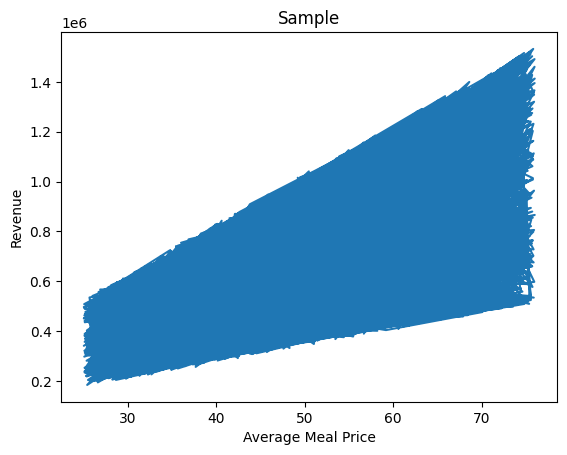

In [36]:
plt.plot(var['Average Meal Price'],var['Revenue'])
plt.xlabel('Average Meal Price')
plt.ylabel('Revenue')
plt.title('Sample')
plt.show()

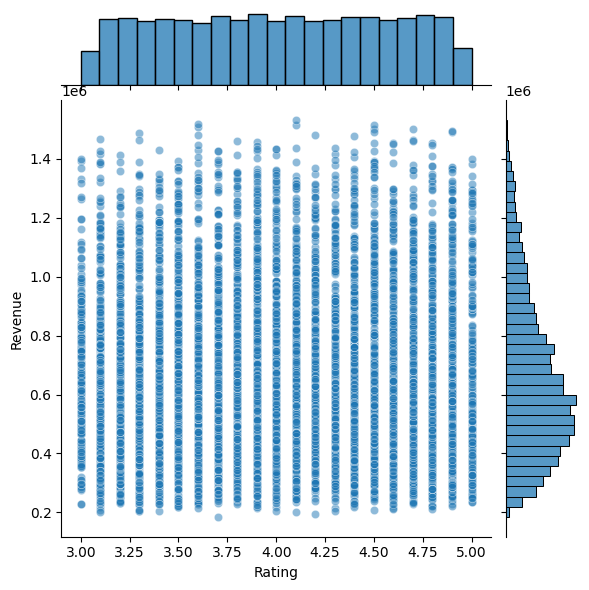

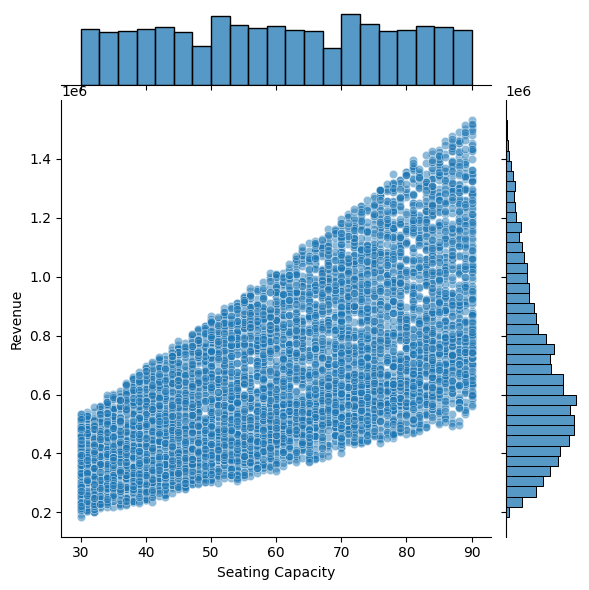

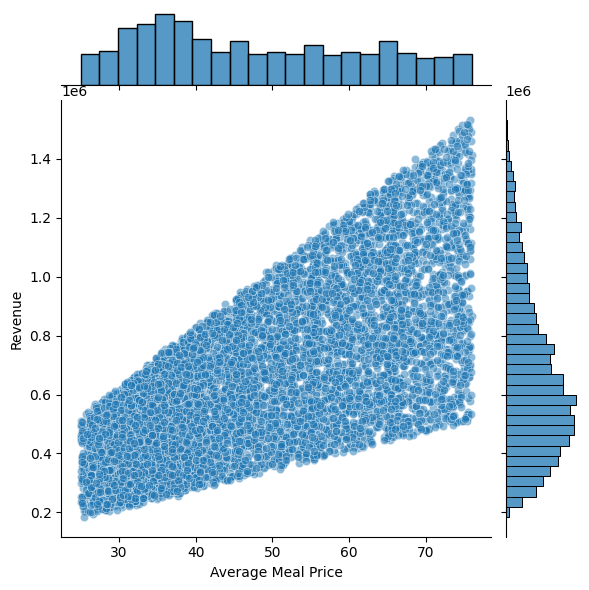

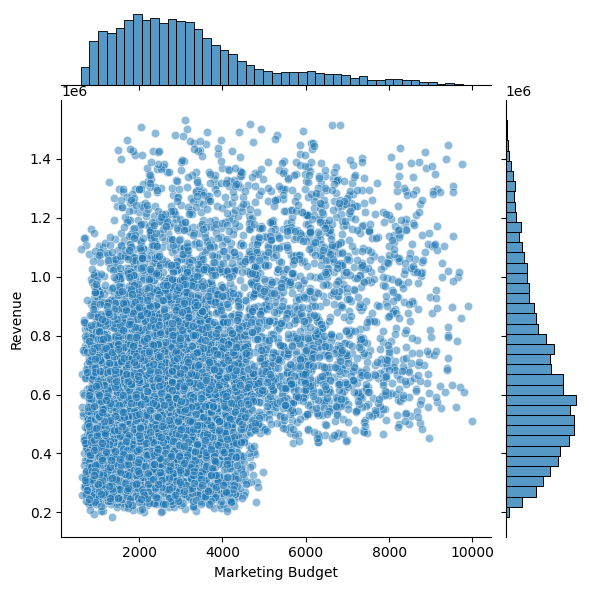

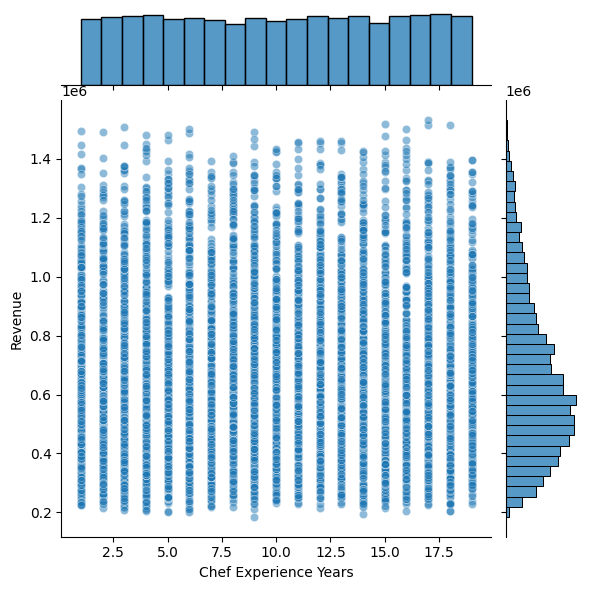

In [38]:
sns.jointplot(x='Rating', y='Revenue', data=var, alpha=0.5)
sns.jointplot(x='Seating Capacity', y='Revenue', data=var, alpha=0.5)
sns.jointplot(x='Average Meal Price', y='Revenue', data=var, alpha=0.5)
sns.jointplot(x='Marketing Budget', y='Revenue', data=var, alpha=0.5)
sns.jointplot(x='Chef Experience Years', y='Revenue', data=var, alpha=0.5)
plt.show()

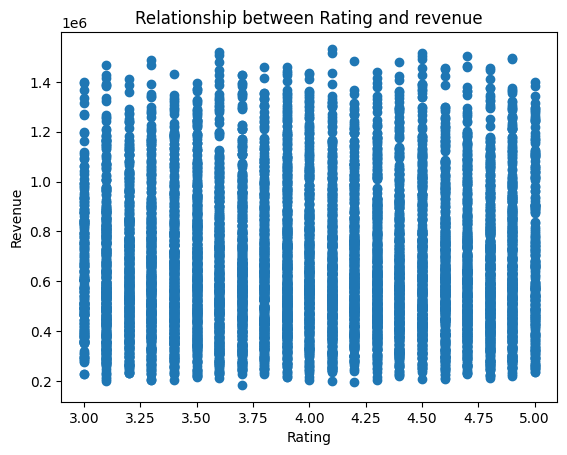

In [39]:
plt.scatter(var['Rating'],var['Revenue'])
plt.xlabel('Rating')
plt.ylabel('Revenue')
plt.title('Relationship between Rating and revenue')
plt.show()
plt.show()

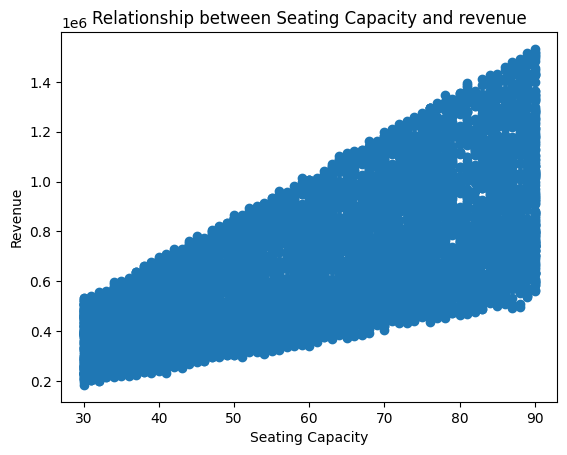

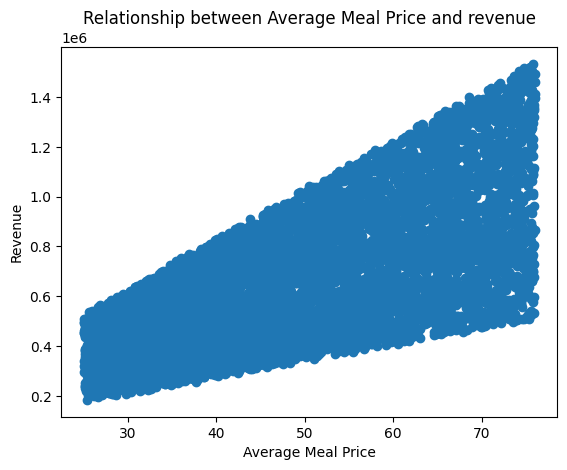

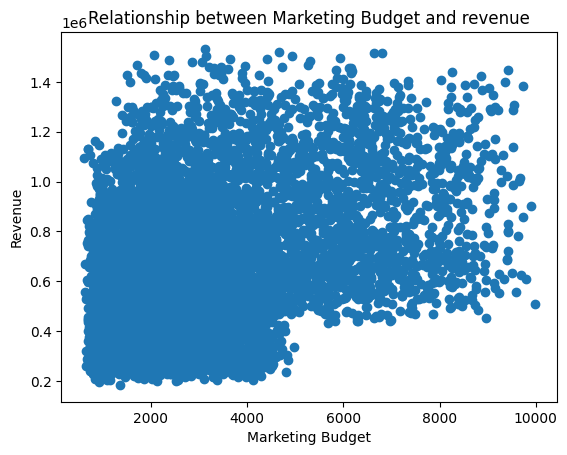

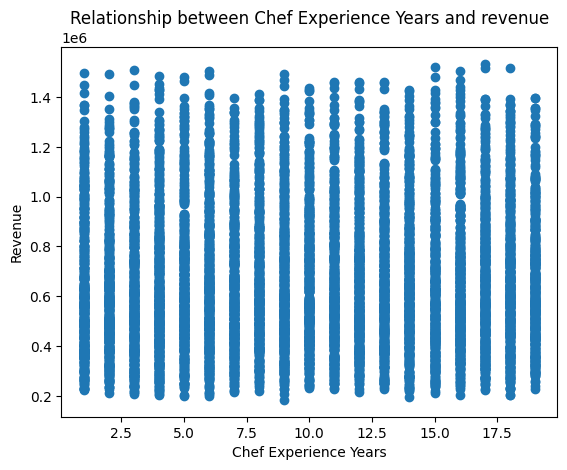

In [42]:

plt.scatter(var['Seating Capacity'],var['Revenue'])
plt.xlabel('Seating Capacity')
plt.ylabel('Revenue')
plt.title('Relationship between Seating Capacity and revenue')
plt.show()

plt.scatter(var['Average Meal Price'],var['Revenue'])
plt.xlabel('Average Meal Price')
plt.ylabel('Revenue')
plt.title('Relationship between Average Meal Price and revenue')
plt.show()

plt.scatter(var['Marketing Budget'],var['Revenue'])
plt.xlabel('Marketing Budget')
plt.ylabel('Revenue')
plt.title('Relationship between Marketing Budget and revenue')
plt.show()

plt.scatter(var['Chef Experience Years'],var['Revenue'])
plt.xlabel('Chef Experience Years')
plt.ylabel('Revenue')
plt.title('Relationship between Chef Experience Years and revenue')
plt.show()


In [44]:

from sklearn.model_selection import train_test_split

In [45]:

x = var[['Rating', 'Seating Capacity', 'Average Meal Price', 'Marketing Budget', 'Chef Experience Years']]
y = var['Revenue']


In [46]:
x.head()
y.head()

0     638945.52
1     490207.83
2     541368.62
3     404556.80
4    1491046.35
Name: Revenue, dtype: float64

In [47]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 42)

In [48]:
x_train.shape
y_train.shape

(5857,)

In [49]:
from sklearn.linear_model import LinearRegression

linear=LinearRegression()
linear.fit(x_train,y_train)

LinearRegression()

In [50]:
linear.coef_
y_pred=linear.predict(x_test)

In [51]:
y_test
y_pred

array([458699.41368204, 227722.97371855, 474335.22029764, ...,
       770129.60031004, 931705.25994262, 963685.99335755])

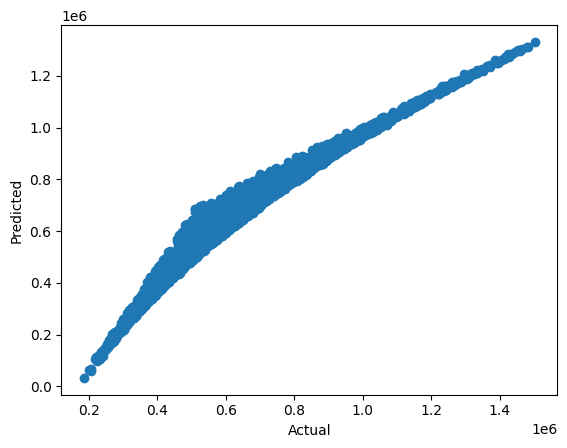

In [52]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [53]:
from sklearn.metrics import mean_absolute_error
print('Mean Absolute Error: ', mean_absolute_error(y_test,y_pred))
from sklearn.metrics import  mean_squared_error
print('Mean Squared Error: ', mean_squared_error(y_test,y_pred))
from sklearn.metrics import r2_score
print('R2 Score: ', r2_score(y_test,y_pred))

Mean Absolute Error:  41748.88307857091
Mean Squared Error:  3037709100.0500245
R2 Score:  0.9573386807330684


Root Mean Squared Error is :  55115.416174152444


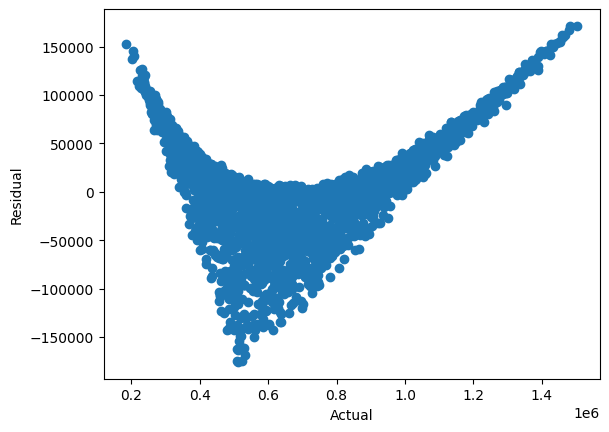

In [54]:
import math
print('Root Mean Squared Error is : ',math.sqrt(mean_squared_error(y_test,y_pred)))

residual=y_test-y_pred
plt.scatter(y_test,residual)
plt.xlabel('Actual')
plt.ylabel('Residual')
plt.show()

<ipython-input-55-8f4c9e04961a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual, bins = 40)


<Axes: xlabel='Revenue', ylabel='Density'>

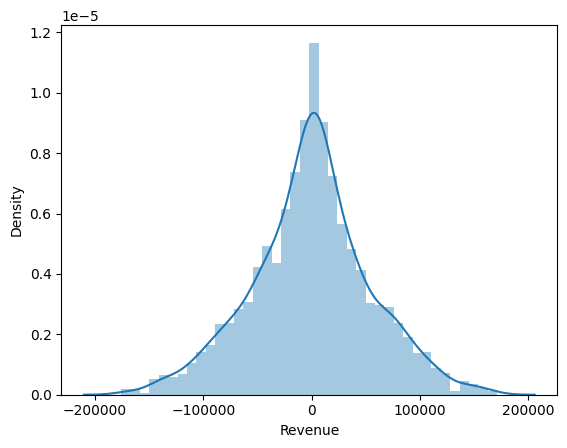

In [55]:
sns.distplot(residual, bins = 40)